In [1]:
!pip install openpyxl seaborn plotly
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


In [2]:
import pandas as pd

df = pd.read_csv("/kaggle/input/global-health-statistics-csv/Global Health Statistics.csv")

df.head()


,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
0,Italy,2013,Malaria,Respiratory,0.95,1.55,8.42,0-18,Male,471007,...,7.58,Medication,21064,No,91.82,4493,2.16,16886,0.79,86.02
1,France,2002,Ebola,Parasitic,12.46,8.63,8.75,61+,Male,634318,...,5.11,Surgery,47851,Yes,76.65,2366,4.82,80639,0.74,45.52
2,Turkey,2015,COVID-19,Genetic,0.91,2.35,6.22,36-60,Male,154878,...,3.49,Vaccination,27834,Yes,98.55,41,5.81,12245,0.41,40.20
3,Indonesia,2011,Parkinson's Disease,Autoimmune,4.68,6.29,3.99,0-18,Other,446224,...,8.44,Surgery,144,Yes,67.35,3201,2.22,49336,0.49,58.47
4,Italy,2013,Tuberculosis,Genetic,0.83,13.59,7.01,61+,Male,472908,...,5.90,Medication,8908,Yes,50.06,2832,6.93,47701,0.50,48.14


In [3]:

df.columns = df.columns.str.strip()

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

missing_data = df.isnull().sum().sort_values(ascending=False)

column_types = df.dtypes

missing_data, column_types


(Country                               0
 Year                                  0
 Education Index                       0
 Per Capita Income (USD)               0
 Improvement in 5 Years (%)            0
 DALYs                                 0
 Recovery Rate (%)                     0
 Availability of Vaccines/Treatment    0
 Average Treatment Cost (USD)          0
 Treatment Type                        0
 Hospital Beds per 1000                0
 Doctors per 1000                      0
 Healthcare Access (%)                 0
 Population Affected                   0
 Gender                                0
 Age Group                             0
 Mortality Rate (%)                    0
 Incidence Rate (%)                    0
 Prevalence Rate (%)                   0
 Disease Category                      0
 Disease Name                          0
 Urbanization Rate (%)                 0
 dtype: int64,
 Country                                object
 Year                               

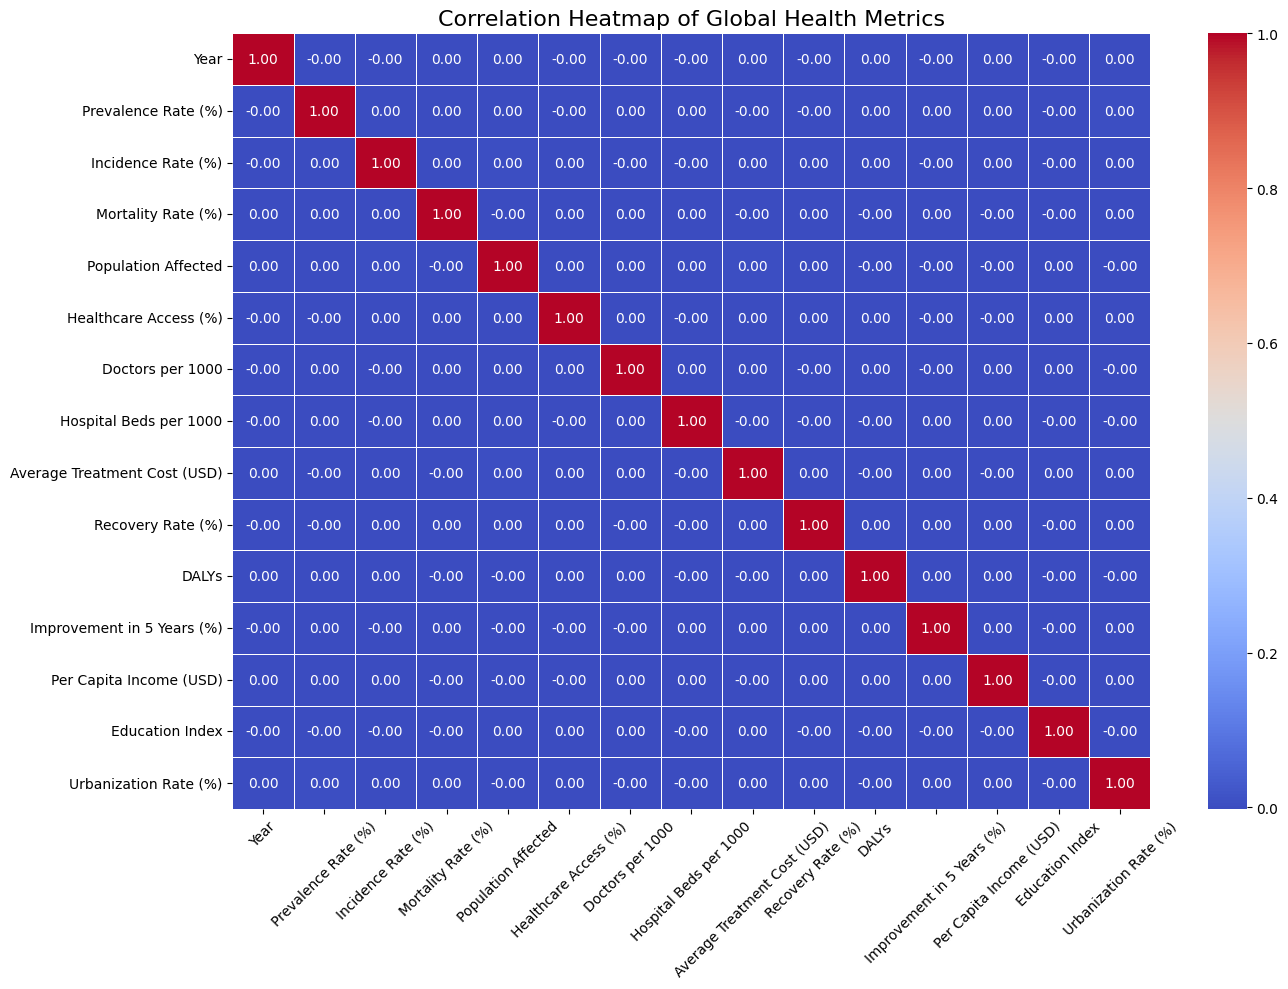

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(14, 10))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Title
plt.title("Correlation Heatmap of Global Health Metrics", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

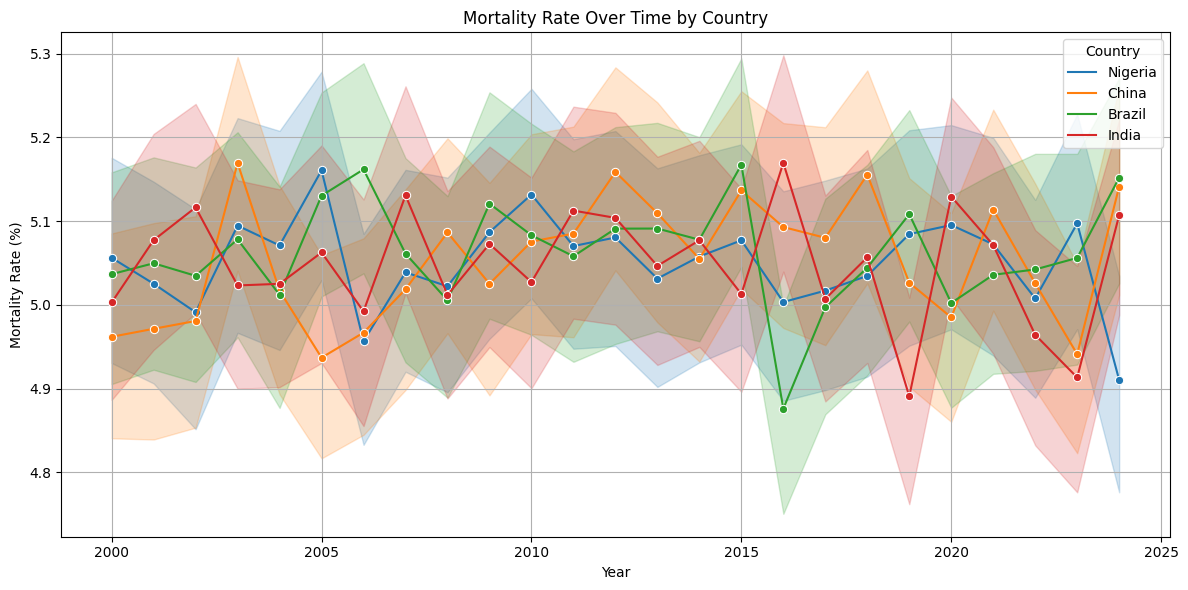

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_countries = ['Nigeria', 'India', 'Brazil', 'United States', 'China']

subset = df[df['Country'].isin(selected_countries)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=subset, x='Year', y='Mortality Rate (%)', hue='Country', marker="o")
plt.title('Mortality Rate Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Mortality Rate (%)')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_13/651348530.py:7: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


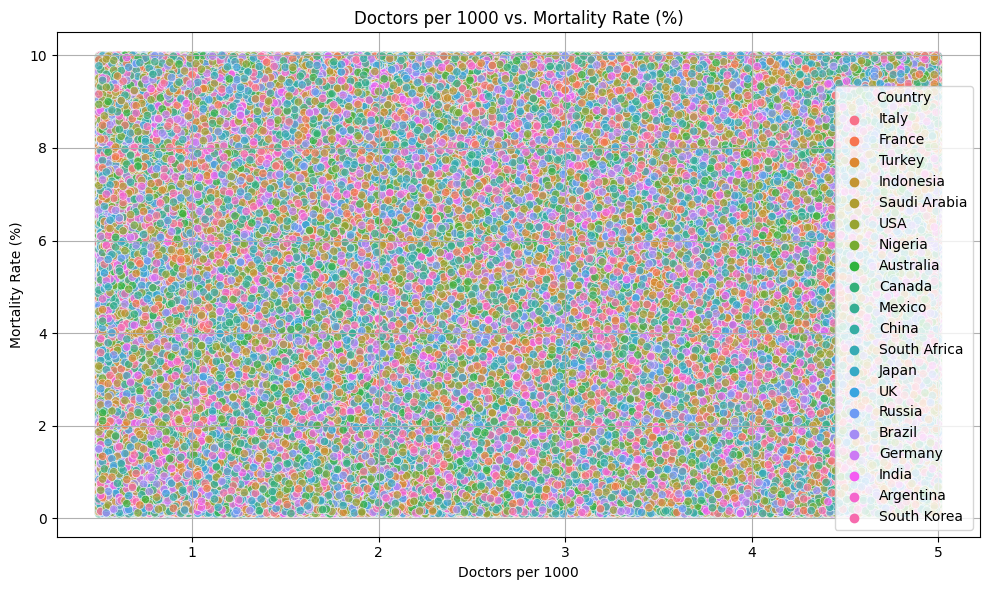

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Doctors per 1000', y='Mortality Rate (%)', hue='Country', alpha=0.7)
plt.title('Doctors per 1000 vs. Mortality Rate (%)')
plt.xlabel('Doctors per 1000')
plt.ylabel('Mortality Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


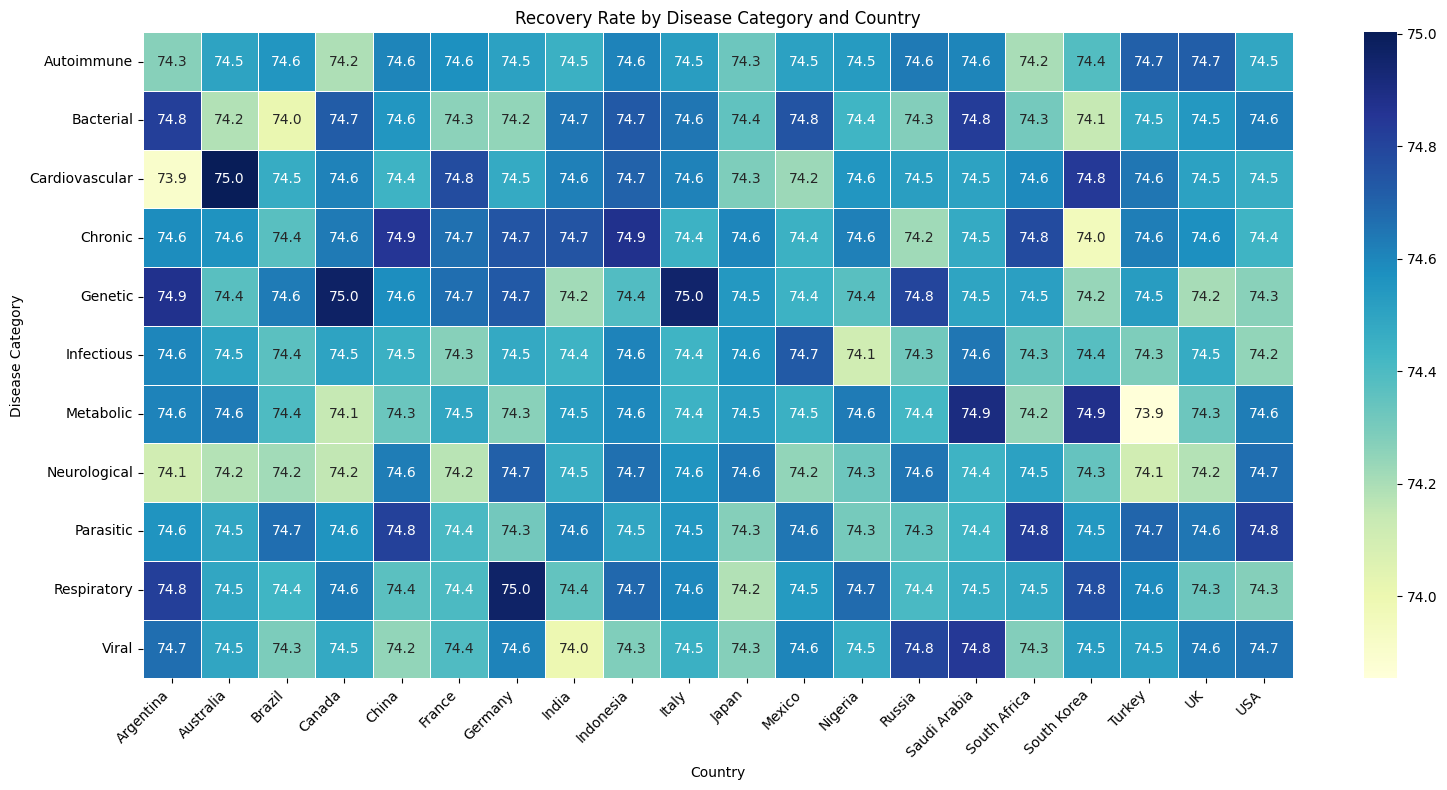

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

heatmap_data = df.groupby(['Disease Category', 'Country'])['Recovery Rate (%)'].mean().reset_index()
heatmap_pivot = heatmap_data.pivot(index='Disease Category', columns='Country', values='Recovery Rate (%)')

plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_pivot, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)

plt.title('Recovery Rate by Disease Category and Country')
plt.xlabel('Country')
plt.ylabel('Disease Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index

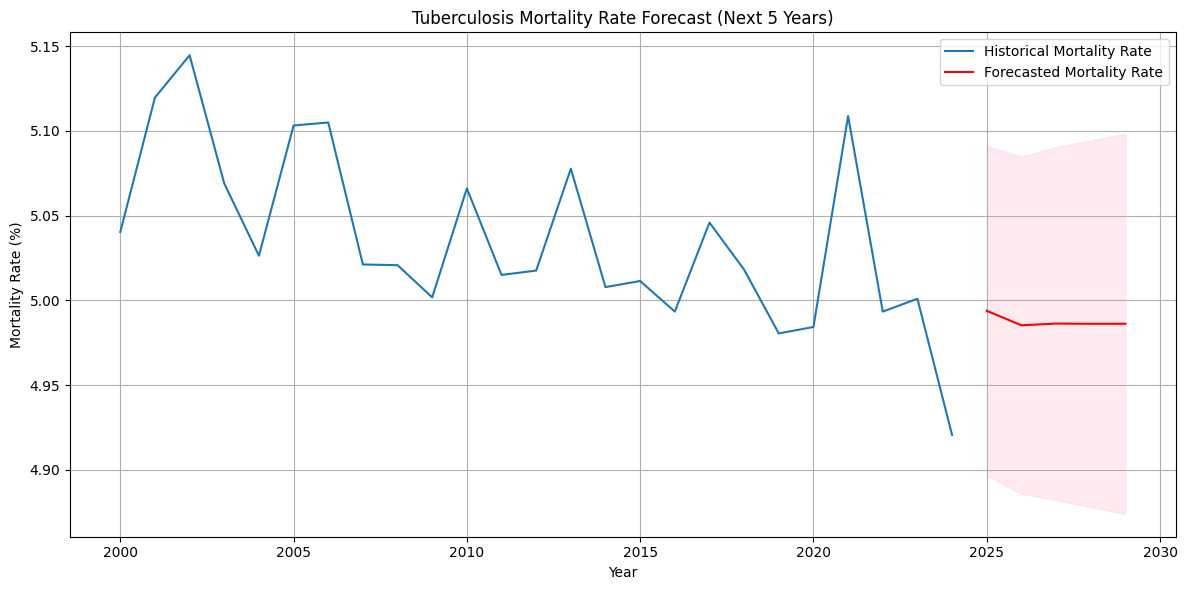

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

tb_data = df[df['Disease Name'] == 'Tuberculosis']

tb_trend = tb_data.groupby('Year')['Mortality Rate (%)'].mean().reset_index()

ts = tb_trend.set_index('Year')['Mortality Rate (%)']

# Fit SARIMAX model (basic ARIMA with order (1,1,1))
model = SARIMAX(ts, order=(1, 1, 1), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)

forecast = results.get_forecast(steps=5)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

future_years = list(range(ts.index.max() + 1, ts.index.max() + 6))

plt.figure(figsize=(12, 6))
plt.plot(ts, label='Historical Mortality Rate')
plt.plot(future_years, forecast_mean, label='Forecasted Mortality Rate', color='red')
plt.fill_between(future_years, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Tuberculosis Mortality Rate Forecast (Next 5 Years)')
plt.xlabel('Year')
plt.ylabel('Mortality Rate (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


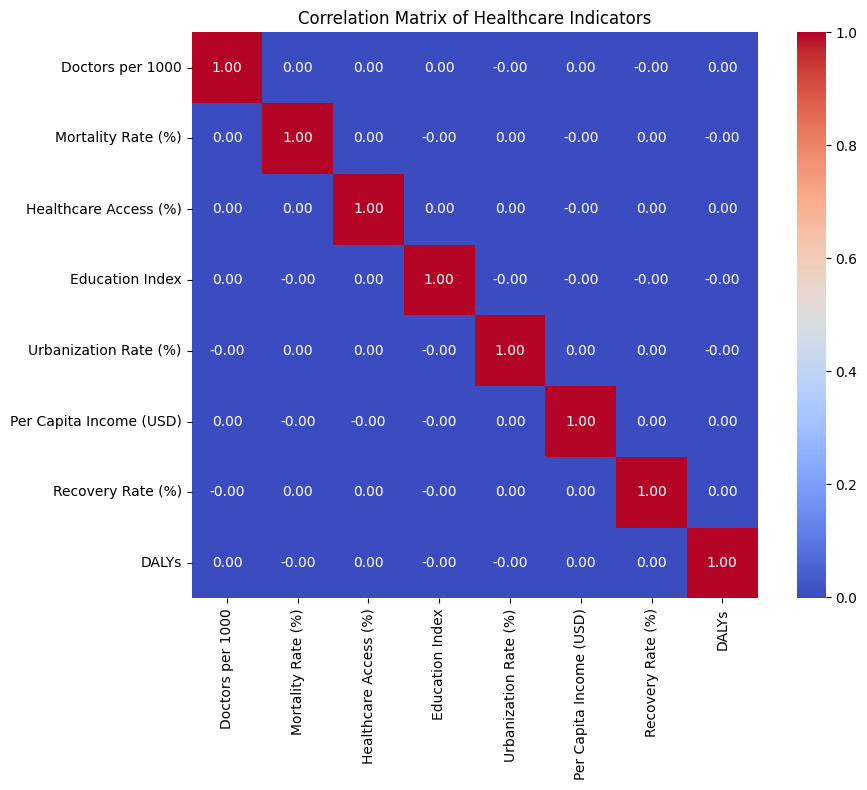

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_data = df[[
    'Doctors per 1000',
    'Mortality Rate (%)',
    'Healthcare Access (%)',
    'Education Index',
    'Urbanization Rate (%)',
    'Per Capita Income (USD)',
    'Recovery Rate (%)',
    'DALYs'
]]

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Healthcare Indicators')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index

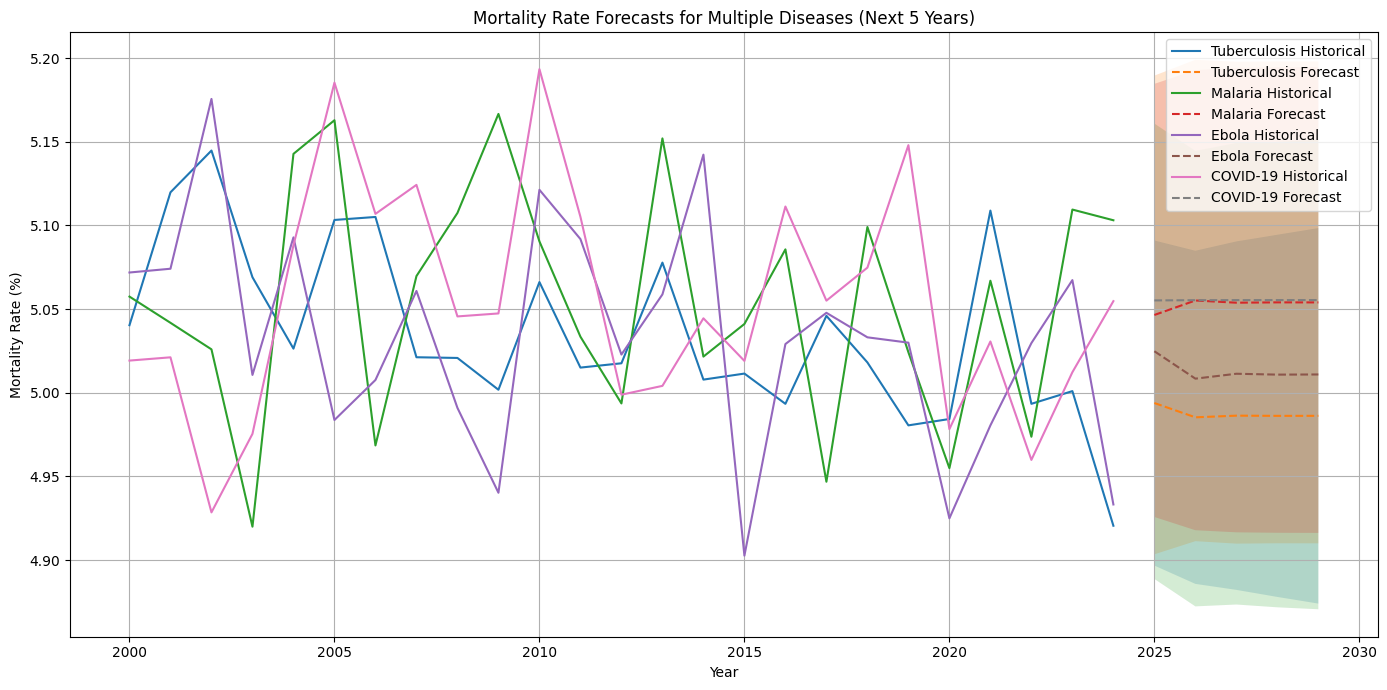

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# List of diseases to forecast
diseases = ['Tuberculosis', 'Malaria', 'Ebola', 'COVID-19']

plt.figure(figsize=(14, 7))

for disease in diseases:

    disease_data = df[df['Disease Name'] == disease]


    disease_trend = disease_data.groupby('Year')['Mortality Rate (%)'].mean().reset_index()


    disease_trend = disease_trend.sort_values('Year')


    ts = disease_trend.set_index('Year')['Mortality Rate (%)']

    # Skip disease if not enough data points
    if len(ts) < 4:
        print(f"Skipping {disease} due to insufficient data points.")
        continue

    # Fit SARIMAX model
    model = SARIMAX(ts, order=(1, 1, 1), enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit(disp=False)

    
    forecast = results.get_forecast(steps=5)
    forecast_mean = forecast.predicted_mean
    conf_int = forecast.conf_int()

    future_years = list(range(ts.index.max() + 1, ts.index.max() + 6))


    plt.plot(ts.index, ts, label=f'{disease} Historical')

    
    plt.plot(future_years, forecast_mean, linestyle='--', label=f'{disease} Forecast')

   
    plt.fill_between(future_years, conf_int.iloc[:, 0], conf_int.iloc[:, 1], alpha=0.2)


plt.title('Mortality Rate Forecasts for Multiple Diseases (Next 5 Years)')
plt.xlabel('Year')
plt.ylabel('Mortality Rate (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Mean Squared Error: 8.37
R² Score: -0.02


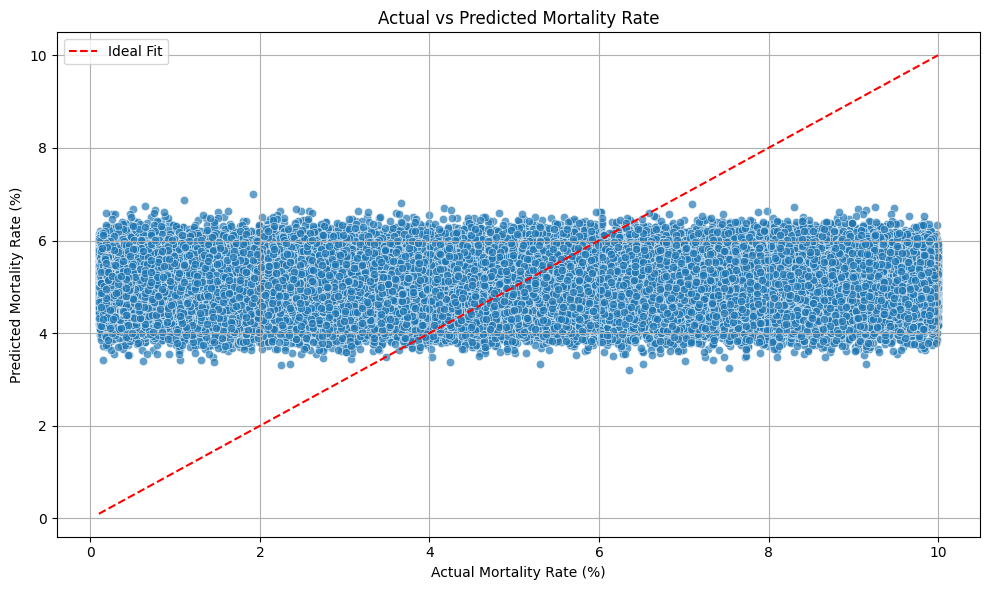

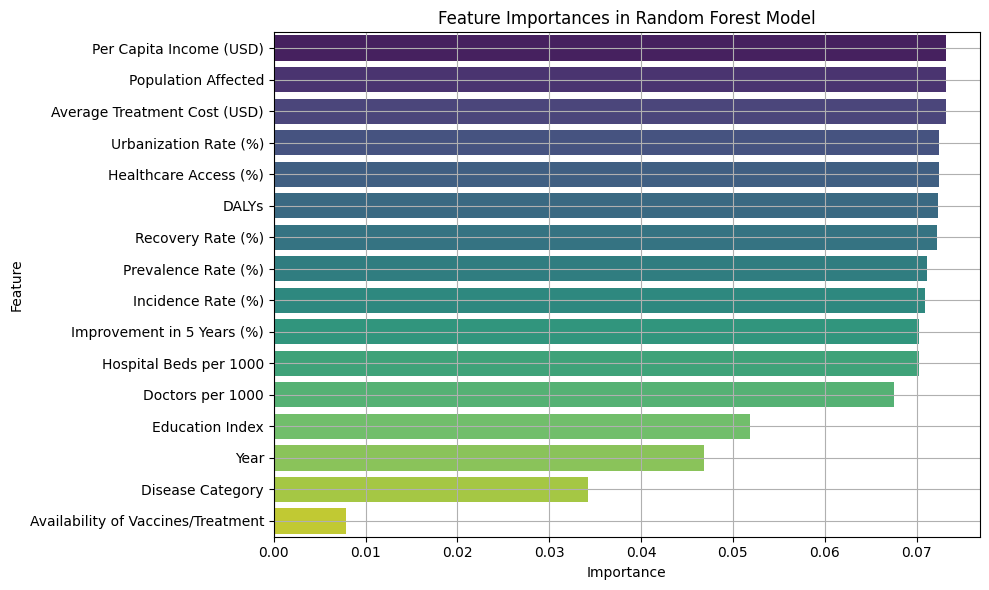

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df_ml = df.copy()

drop_cols = ['Country', 'Disease Name', 'Age Group', 'Gender', 'Treatment Type']
df_ml.drop(columns=drop_cols, inplace=True)

label_cols = ['Disease Category', 'Availability of Vaccines/Treatment']
le_dict = {}
for col in label_cols:
    le = LabelEncoder()
    df_ml[col] = le.fit_transform(df_ml[col])
    le_dict[col] = le  # Save encoders if needed for inverse transformation later

X = df_ml.drop(columns=['Mortality Rate (%)'])
y = df_ml['Mortality Rate (%)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal Fit')
plt.xlabel("Actual Mortality Rate (%)")
plt.ylabel("Predicted Mortality Rate (%)")
plt.title("Actual vs Predicted Mortality Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

importances = model.feature_importances_
feature_names = X.columns
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importances in Random Forest Model')
plt.tight_layout()
plt.grid(True)
plt.show()


In [12]:

results_df = pd.DataFrame({
    'Actual Mortality Rate (%)': y_test.values,
    'Predicted Mortality Rate (%)': y_pred,
    'Residual (Error)': y_test.values - y_pred
})

# Save to CSV
results_df.to_csv("mortality_predictions.csv", index=False)
print("Predictions exported to 'mortality_predictions.csv'")


Predictions exported to 'mortality_predictions.csv'


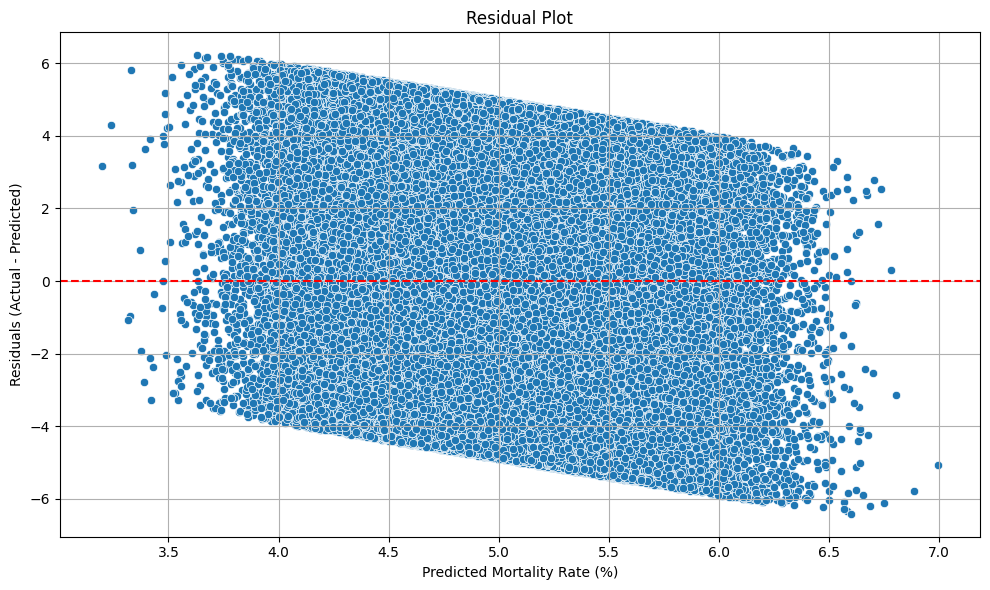

In [13]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Mortality Rate (%)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
import pandas as pd

disease_cat_le = LabelEncoder().fit(df['Disease Category'])
vacc_avail_le = LabelEncoder().fit(df['Availability of Vaccines/Treatment'])

new_sample_dict = {
    'Year': 2026,
    'Prevalence Rate (%)': 1.2,
    'Incidence Rate (%)': 2.0,
    'Population Affected': 500000,
    'Healthcare Access (%)': 75.0,
    'Doctors per 1000': 3.5,
    'Hospital Beds per 1000': 4.5,
    'Average Treatment Cost (USD)': 15000,
    'Recovery Rate (%)': 85.0,
    'DALYs': 3000,
    'Improvement in 5 Years (%)': 5.0,
    'Per Capita Income (USD)': 20000,
    'Education Index': 0.7,
    'Urbanization Rate (%)': 60.0,
    'Disease Category': disease_cat_le.transform(['Genetic'])[0],  # encoded
    'Availability of Vaccines/Treatment': vacc_avail_le.transform(['Yes'])[0]  # encoded
}

new_samples = pd.DataFrame([new_sample_dict])

feature_columns = X.columns.tolist()
new_samples = new_samples[feature_columns]

predicted_mortality = model.predict(new_samples)

print(f"Predicted Mortality Rate (%): {predicted_mortality[0]:.2f}")


Predicted Mortality Rate (%): 5.28


In [15]:

results_df = pd.DataFrame({
    'Actual Mortality Rate (%)': y_test,
    'Predicted Mortality Rate (%)': y_pred
})


results_df.to_csv('mortality_rate_predictions_test.csv', index=False)

print("Test set predictions saved as 'mortality_rate_predictions_test.csv'")


Test set predictions saved as 'mortality_rate_predictions_test.csv'


In [16]:
new_samples['Predicted Mortality Rate (%)'] = predicted_mortality

new_samples.to_csv('new_sample_prediction.csv', index=False)

print("New sample prediction saved as 'new_sample_prediction.csv'")


New sample prediction saved as 'new_sample_prediction.csv'
